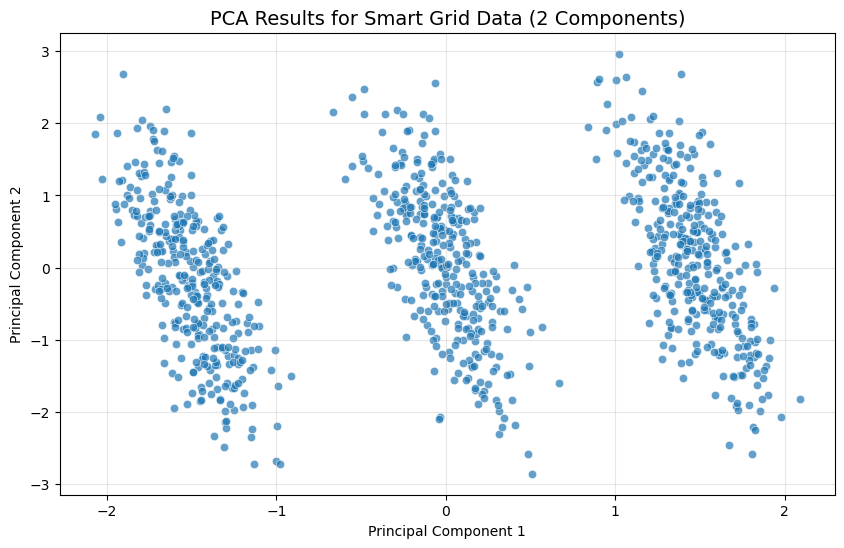

Explained Variance Ratio: [0.15334568 0.1127808 ]


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n_samples = 1000

data = {
    "Time_of_Day": np.random.choice(range(24), n_samples),
    "Energy_Demand_kW": np.random.uniform(50, 500, n_samples),
    "Energy_Supply_kW": np.random.uniform(60, 520, n_samples),
    "Temperature_C": np.random.uniform(0, 40, n_samples),
    "Humidity_%": np.random.uniform(20, 100, n_samples),
    "Wind_Speed_mps": np.random.uniform(0, 15, n_samples),
    "Renewable_Contribution_%": np.random.uniform(10, 80, n_samples),
    "Energy_Loss_%": np.random.uniform(5, 15, n_samples),
    "Load_Type": np.random.choice(["Residential", "Commercial", "Industrial"], n_samples)
}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=["Load_Type"], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.select_dtypes(include=[np.number]))

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=df_pca, alpha=0.7, edgecolor='w')
plt.title("PCA Results for Smart Grid Data (2 Components)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.show()

print("Explained Variance Ratio:", explained_variance)